**Models**:
- Binary Classifier (BC)
- Random Forest (RF)
- Neural Network (NN)

# Load Packages

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import backend as K

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA

# Load Datasets and Basic Data Cleaning

## BC & RF: features dataset

In [4]:
df_feature = pd.read_csv('~data/feature_extraction.csv')
df_feature = df_feature.dropna(how='all', subset=df_feature.columns[2:])
df_feature

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,CHL_11x11_median,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3
0,2022-03-04,Anderby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.174551,163.135918,152.993287,9.480745,126.656470,115.165835,8.739565,184.262455,175.823985,10.048879
1,2022-03-04,Bexhill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.088710,68.446416,59.178691,9.029485,62.619209,52.394663,7.873103,72.854860,63.530318,10.056020
2,2022-03-04,Birling Gap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.805366,93.880434,87.483492,11.032810,70.399693,59.039690,9.145264,91.852595,100.279610,12.380630
3,2022-03-04,"Botany Bay, Broadstairs",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.761849,83.942460,70.130099,8.039195,68.796310,53.251103,5.826829,101.135487,94.071441,8.775965
4,2022-03-04,Brightlingsea,62.57270,42.77478,10.132153,62.57270,42.77478,10.132153,62.57270,42.77478,...,8.110302,68.449360,52.265659,8.602104,62.192470,44.807648,7.444274,76.858376,60.001347,9.831872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28475,2022-10-31,Whitby,96.45255,67.53166,6.800380,96.45255,67.53166,6.800380,96.45255,67.53166,...,5.693440,33.249046,30.364642,5.453727,10.124196,6.075947,5.170083,17.858250,11.138832,6.066630
28476,2022-10-31,Whitley Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.309310,44.649534,46.954763,5.177130,7.078911,4.246786,3.856401,10.785609,6.658894,6.085422
28477,2022-10-31,Widemouth Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.953294,9.439017,6.185049,3.555955,1.677360,0.976173,2.053952,9.585481,5.794549,4.352078
28478,2022-10-31,Wilsthorpe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.383949,140.258110,127.778108,4.487975,58.708913,42.690909,3.901447,175.019072,162.879985,4.956142


## NN: sites_data.csv

In [7]:
sites_data = pd.read_csv("~data/sites_data_11x11.csv")
sites_data

,time,lat,lon,TUR,SPM,CHL,site
0,2022-03-01,55.189352,-1.519043,NaN,NaN,NaN,Newbiggin North
1,2022-03-01,55.189352,-1.517296,NaN,NaN,NaN,Newbiggin North
2,2022-03-01,55.189352,-1.515549,NaN,NaN,NaN,Newbiggin North
3,2022-03-01,55.189352,-1.513802,NaN,NaN,NaN,Newbiggin North
4,2022-03-01,55.189352,-1.512055,NaN,NaN,NaN,Newbiggin North
...,...,...,...,...,...,...,...
12331105,2022-10-31,50.277315,-3.893256,2.006134,1.186131,1.828091,Bigbury-on-Sea South
12331106,2022-10-31,50.277315,-3.891509,0.708182,0.406647,1.046769,Bigbury-on-Sea South
12331107,2022-10-31,50.277315,-3.889762,1.258156,0.729469,1.327342,Bigbury-on-Sea South
12331108,2022-10-31,50.277315,-3.888015,1.037095,0.598882,1.254974,Bigbury-on-Sea South


In [9]:
sites_data.isnull().sum()

time           0
lat            0
lon            0
TUR     10838900
SPM     10838900
CHL     10838900
site           0
dtype: int64

In [10]:
# Fill Null Values with 0, as we cannot have missing values in the tensors for neural network
# Later we will remove time, site pairs where all values are 0

sites_data.fillna(value=0, inplace=True)

## All: Pollution Data

In [121]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')

In [122]:
# removing dates outside of range of 2022-03-01 to 2022-10-31
riskforecasting = riskforecasting[(riskforecasting['time'] >= '2022-03-01') & (riskforecasting['time'] <= '2022-10-31')]
riskforecasting

,site,time,warning,riskLevelLabel
0,Ainsdale,2022-04-28,Pollution RIsk Forecasts will start soon,normal
1,Ainsdale,2022-04-29,Pollution RIsk Forecasts will start soon,normal
2,Ainsdale,2022-04-30,Pollution RIsk Forecasts will start soon,normal
3,Ainsdale,2022-05-04,No warnings in place,normal
4,Ainsdale,2022-05-05,No warnings in place,normal
...,...,...,...,...
69519,Yaverland,2022-09-26,No pollution incidents reported,normal
69520,Yaverland,2022-09-27,No pollution incidents reported,normal
69521,Yaverland,2022-09-28,No pollution incidents reported,normal
69522,Yaverland,2022-09-29,No pollution incidents reported,normal


In [100]:
# 9 sites out of 430 sites do not have data for 2022 (they were dedesignated before 2022)

missing_sites = []

for site in sites_data['site'].unique():
    if site not in riskforecasting['site'].unique():
        missing_sites.append(site)
        
        
missing_sites

['Allonby South',
 'Ilfracombe Wildersmouth',
 'Burnham Jetty North',
 'Staithes',
 'Clacton (Groyne 41)',
 'Rock',
 'Silloth',
 'Instow',
 'Lyme Regis Church Cliff Beach']

# Data Manipulation and Further Data Cleaning

### BC & RF: Replace NaNs with mean

In [12]:
def fill_na_values_with_mean(row, feature, dimensions):
    if pd.isnull(row).any():
        for dim in dimensions:
            if pd.isna(row[f"{feature}_{dim}x{dim}_median"]):
                available_medians = row[[f"{feature}_{i}x{i}_median" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_median"])]]
                row[f"{feature}_{dim}x{dim}_median"] = available_medians.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_mean"]):
                available_means = row[[f"{feature}_{i}x{i}_mean" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_mean"])]]
                row[f"{feature}_{dim}x{dim}_mean"] = available_means.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_q1"]):
                available_q1s = row[[f"{feature}_{i}x{i}_q1" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_q1"])]]
                row[f"{feature}_{dim}x{dim}_q1"] = available_q1s.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_q3"]):
                available_q3s = row[[f"{feature}_{i}x{i}_q3" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_q3"])]]
                row[f"{feature}_{dim}x{dim}_q3"] = available_q3s.mean()
    return row

# apply the function to the DataFrame
dimensions = range(1, 12, 2)
df_feature_mean = df_feature
for feature in ["TUR", "SPM", "CHL"]:
    df_feature_mean = df_feature_mean.apply(fill_na_values_with_mean, axis=1, args=(feature, dimensions))
df_feature_mean

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,CHL_11x11_median,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3
0,2022-03-04,Anderby,154.820731,154.400027,9.514567,181.745684,179.326187,9.955211,133.352782,132.044801,...,9.174551,163.135918,152.993287,9.480745,126.656470,115.165835,8.739565,184.262455,175.823985,10.048879
1,2022-03-04,Bexhill,70.972747,61.532125,9.750251,70.301750,60.002133,9.671340,64.056580,53.386457,...,9.088710,68.446416,59.178691,9.029485,62.619209,52.394663,7.873103,72.854860,63.530318,10.056020
2,2022-03-04,Birling Gap,104.749541,103.453165,12.341927,116.809493,114.741870,12.746209,92.506296,85.332210,...,10.805366,93.880434,87.483492,11.032810,70.399693,59.039690,9.145264,91.852595,100.279610,12.380630
3,2022-03-04,"Botany Bay, Broadstairs",94.788783,80.138161,6.847596,96.950370,83.579236,8.478793,80.982484,66.573753,...,6.761849,83.942460,70.130099,8.039195,68.796310,53.251103,5.826829,101.135487,94.071441,8.775965
4,2022-03-04,Brightlingsea,62.572700,42.774780,10.132153,62.572700,42.774780,10.132153,62.572700,42.774780,...,8.110302,68.449360,52.265659,8.602104,62.192470,44.807648,7.444274,76.858376,60.001347,9.831872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28475,2022-10-31,Whitby,96.452550,67.531660,6.800380,96.452550,67.531660,6.800380,96.452550,67.531660,...,5.693440,33.249046,30.364642,5.453727,10.124196,6.075947,5.170083,17.858250,11.138832,6.066630
28476,2022-10-31,Whitley Bay,13.986871,8.806653,5.616894,38.060499,35.351141,6.012649,10.045105,6.241306,...,4.309310,44.649534,46.954763,5.177130,7.078911,4.246786,3.856401,10.785609,6.658894,6.085422
28477,2022-10-31,Widemouth Sand,14.621939,9.925846,4.180759,26.581445,18.738095,4.281405,10.205435,6.780138,...,2.953294,9.439017,6.185049,3.555955,1.677360,0.976173,2.053952,9.585481,5.794549,4.352078
28478,2022-10-31,Wilsthorpe,148.917323,129.900977,4.681791,192.257144,182.834253,4.814442,106.035125,88.341231,...,4.383949,140.258110,127.778108,4.487975,58.708913,42.690909,3.901447,175.019072,162.879985,4.956142


In [28]:
df_merged = pd.merge(df_feature_mean, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
df_merged

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3,riskLevelLabel
0,2022-03-17,Clacton Beach Martello Tower,118.376822,128.804776,6.110912,133.637767,131.241699,9.204947,99.024699,106.786907,...,134.067451,142.038767,9.482202,111.699040,124.813703,5.826829,143.633530,163.137970,9.977942,normal
1,2022-03-17,Frinton,121.957180,124.314230,9.526196,121.957180,124.314230,9.526196,121.957180,124.314230,...,119.602328,123.807567,8.214204,88.586640,99.837202,7.366510,141.179335,146.104910,9.199348,normal
2,2022-03-17,Holland,93.886387,127.049447,8.882336,94.090882,131.558654,8.536945,79.780317,117.204654,...,100.306580,120.473114,8.594822,87.195181,106.791605,5.838983,110.272972,130.367225,10.113032,normal
3,2022-03-25,Saltburn,32.998279,22.903673,8.738211,45.352201,34.120773,9.010215,22.092991,15.095140,...,28.619714,20.838840,8.042007,8.039810,4.767018,6.669945,41.280960,30.303242,9.205191,normal
4,2022-04-28,Anderby,110.902304,85.303489,8.383559,116.693696,87.915464,9.054671,98.014877,73.599407,...,93.950831,70.109661,8.508453,76.845565,55.396332,7.529623,103.967715,81.554440,9.071618,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,2022-09-30,"West Beach, Whitstable",81.680690,59.724228,8.813577,81.680690,59.724228,8.813577,81.680690,59.724228,...,58.557553,42.544375,8.810097,46.346252,32.059539,7.694540,71.138872,52.966091,9.407869,normal
17758,2022-09-30,West Mersea,49.489470,33.493950,8.567818,49.489470,33.493950,8.567818,49.489470,33.493950,...,81.927657,61.990242,8.165309,50.057903,33.471867,7.580462,104.015840,79.363790,8.339877,normal
17759,2022-09-30,West Runton,69.653060,58.496560,10.725086,69.653060,58.496560,10.725086,69.653060,58.496560,...,30.566341,25.068547,6.740001,13.936001,9.034503,5.398032,38.325114,30.779965,7.901433,normal
17760,2022-09-30,"Westbrook Bay, Margate",66.349400,49.060455,17.224031,66.349400,49.060455,17.224031,66.349400,49.060455,...,49.269262,34.810783,7.883557,39.316710,24.902056,7.230105,54.697723,40.696842,8.076657,normal


## NN: Combine Datasets to Create Input Dataset
For every site (430) and time (237), create a 11 x 11 x 3 tensor, each corresponding to one risk level label 

In [80]:
%%time
def chl_to_array(chl_values):
    # Not 100% sure if this reshapes according to lat/lon (though it does not matter if we perform the same operation every time?)
    return np.array(chl_values).reshape(11, 11)

def get_features_data(sites_data, features_list):
    '''
    input: 
        - sites_data (pd.DataFrame):
            - dataframe where each row contains feature values for a time, site and coordinate
        - features_list (list):
            - list of strings of features to use
            
    output:
        - features data (pd.DataFrame)
            - row: data for every time and site pair
            - column: features
            - entries: np.array of shape 11x11
    '''
    dfs = []
    for feature in features_list:
        df = pd.DataFrame(sites_data.groupby(['time', 'site'])[feature].apply(chl_to_array))
        dfs.append(df)
    input_data = reduce(lambda  left,right: pd.merge(left,right,on=['time', 'site'],how='outer'), dfs)
    
    return input_data

features_df = get_features_data(sites_data, ['TUR', 'SPM', 'CHL'])
features_df

CPU times: user 6.37 s, sys: 1.06 s, total: 7.43 s
Wall time: 8.2 s


TUR   
time       site                                                                        
2022-03-01 Ainsdale                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  \
           Allonby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Allonby South           [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Amble Links             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Anderby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                              ...   
2022-10-31 Withernsea              [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Wolvercote Mill Stream  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Woolacombe Village      [[5.9864016, 25.982555, 0.0, 0.0, 0.0, 0.0, 0....   
           Worthing                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Yaverland               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                                                 SPM   
time       site                                                                        
2022-03-01 Ainsdale                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  \
           Allonby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Allonby South           [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Amble Links             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Anderby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
...                                                                              ...   
2022-10-31 Withernsea              [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Wolvercote Mill Stream  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Woolacombe Village      [[3.564524, 16.43204, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Worthing                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   
           Yaverland               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...   

                                                                                 CHL  
time       site                                                                       
2022-03-01 Ainsdale                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Allonby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Allonby South           [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Amble Links             [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Anderby                 [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
...                                                                              ...  
2022-10-31 Withernsea              [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Wolvercote Mill Stream  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Woolacombe Village      [[6.564089, 6.803925, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Worthing                [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  
           Yaverland               [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...  

[101910 rows x 3 columns]

In [81]:
features_df.isnull().sum()

TUR    0
SPM    0
CHL    0
dtype: int64

In [82]:
riskforecasting.isnull().sum()

site              0
time              0
warning           0
riskLevelLabel    0
dtype: int64

In [119]:
# Merging datasets (only add CHL values if we have riskLevelLabel)
input_data = riskforecasting.merge(features_df, how='left', on=['time', 'site'])
input_data.shape

(63578, 7)

In [84]:
# Missing data check
# Data missing for 07-23 and 07-25 for all sites - No satellite data
# Data missing for 04-06 Summerleaze - no satellite data for all sites on the day, no riskforecasting data for all sites except summerleaze on the day

input_data[input_data['CHL'].isnull()]['time'].value_counts()

time
2022-07-23    421
2022-07-25    421
2022-04-06      1
Name: count, dtype: int64

In [85]:
riskforecasting[riskforecasting['time'] == '2022-04-06']

,site,time,warning,riskLevelLabel
55665,Summerleaze,2022-04-06,Risk of reduced water quality due to sewage,increased


In [120]:
# Drop NA values
input_data.dropna(inplace=True)
input_data.shape

(62735, 7)

In [87]:
# Remove rows where everything is 0 (i.e. all missing values)
def has_nonzero(arr):
    return np.any(arr != 0)

input_data = input_data[input_data['CHL'].apply(has_nonzero)]
input_data

,site,time,warning,riskLevelLabel,TUR,SPM,CHL
1,Ainsdale,2022-04-29,Pollution RIsk Forecasts will start soon,normal,"[[3.0191753, 4.718409, 18.93536, 31.146648, 17...","[[1.7733235, 2.7514145, 11.544017, 19.844542, ...","[[3.7512763, 5.389326, 19.847187, 21.874485, 5..."
3,Ainsdale,2022-05-04,No warnings in place,normal,"[[6.075095, 8.419083, 17.229292, 32.485336, 56...","[[3.7166793, 5.1792426, 10.841286, 22.20052, 5...","[[7.8970146, 8.904125, 19.88592, 23.188456, 5...."
6,Ainsdale,2022-05-07,No warnings in place,normal,"[[7.0757475, 8.779541, 17.503372, 31.796015, 8...","[[4.3843403, 5.4292417, 11.049892, 21.979761, ...","[[7.3157673, 8.303483, 17.746412, 20.563904, 4..."
11,Ainsdale,2022-05-12,No warnings in place,normal,"[[11.064278, 13.916054, 24.395746, 46.244003, ...","[[6.9718647, 8.925689, 15.609535, 33.33457, 68...","[[8.789717, 9.66038, 23.01165, 27.012566, 5.88..."
13,Ainsdale,2022-05-14,No warnings in place,normal,"[[13.135989, 17.599348, 28.951145, 57.160267, ...","[[8.290485, 11.462988, 18.59951, 41.832813, 51...","[[9.688214, 10.983141, 27.479614, 32.686024, 6..."
...,...,...,...,...,...,...,...
63555,Yaverland,2022-09-08,No pollution incidents reported,normal,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
63560,Yaverland,2022-09-13,No pollution incidents reported,normal,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
63565,Yaverland,2022-09-18,No pollution incidents reported,normal,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
63570,Yaverland,2022-09-23,No pollution incidents reported,normal,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Train-Test Split
- Pick time-site pairs to use as train data and test data
- Potential for implementing cross validation

In [101]:
time_site_pairs = input_data[['time', 'site']]

# 80/20 split
time_site_pairs_test = time_site_pairs.sample(frac=.2, random_state=42)
time_site_pairs_test

,time,site
53796,2022-05-28,Tankerton
38563,2022-06-21,Porthluney
29452,2022-04-28,Margate The Bay
44371,2022-08-27,Scarborough North Bay
18572,2022-09-29,Fleetwood
...,...,...
4681,2022-09-28,Bournemouth Alum Chine
417,2022-08-25,Amble Links
12837,2022-09-26,Crackington Haven
49602,2022-07-03,Slapton Sands Torcross


In [102]:
time_site_pairs_train = time_site_pairs[~time_site_pairs.isin(time_site_pairs_test)].dropna()
time_site_pairs_train

,time,site
3,2022-05-04,Ainsdale
6,2022-05-07,Ainsdale
13,2022-05-14,Ainsdale
21,2022-05-22,Ainsdale
23,2022-05-24,Ainsdale
...,...,...
63532,2022-08-14,Yaverland
63537,2022-08-19,Yaverland
63546,2022-08-29,Yaverland
63565,2022-09-18,Yaverland


# Train & Test Models 
- Train on training time-site pairs
- Test on testing time-site pairs

## BC

## RF

In [103]:
# Train-test split
df_train = df_merged.merge(time_site_pairs_train, on=['time', 'site'], how='inner')
df_test = df_merged.merge(time_site_pairs_test, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_test = df_test


print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (14210, 72)
Training y Shape: (14210,)
Testing X Shape: (3552, 72)
Testing y Shape: (3552,)


In [104]:
# fit a random forest to the data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# make predictions
y_pred = rf.predict(X_test)

# evaluate the performance
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

   increased       0.45      0.07      0.12        73
      normal       0.98      1.00      0.99      3479

    accuracy                           0.98      3552
   macro avg       0.72      0.53      0.55      3552
weighted avg       0.97      0.98      0.97      3552



- predict well with the 'normal' risk level but not with the 'increased'.

### Importance of Feature Aggregation

In [105]:
importance_dict = dict(zip(df_train.columns, rf.feature_importances_))

features = ['11x11', '9x9', '7x7', '5x5', '3x3', '1x1', 'TUR', 'SPM', 'CHL']

data = []
for s in features:
    sum_importance = np.sum([importance for feature, importance in importance_dict.items() if s in feature])
    data.append([s, sum_importance])

# Create a DataFrame with the calculated data
df_importances = pd.DataFrame(data, columns=['Feature', 'Sum of Importances'])

def highlight_max(s):
    if len(s) > 3:
        return ['background-color: #DEB887' if v in list(s[np.argsort(s)[-3:]]) else '' for v in s]
    else:
        return ['background-color: #8FBC8F' if v == s.max() else '' for v in s]

df_importances[:6].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
0,11x11,0.170693
1,9x9,0.155517
2,7x7,0.179622
3,5x5,0.174120
4,3x3,0.172224
5,1x1,0.318518


In [106]:
df_importances[-3:].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
6,TUR,0.325505
7,SPM,0.326145
8,CHL,0.348350


### PCA

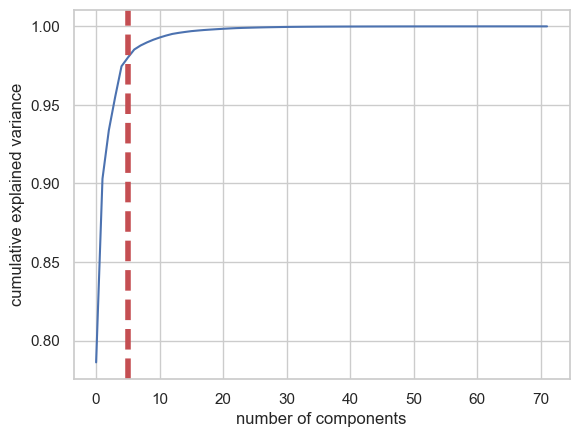

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.786084,0.786084
1,0.902957,0.116873
2,0.933811,0.030853
3,0.955089,0.021278
4,0.974621,0.019532
5,0.980139,0.005518
6,0.985255,0.005116
7,0.987828,0.002573
8,0.989788,0.001960
9,0.991482,0.001694


In [107]:
pca_test = PCA(n_components=72)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [108]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [109]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=df_train.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
TUR_1x1_median,0.147515,-0.048194,0.342269,-0.048438,0.116963,-0.030216,0.065585,-0.077202,-0.106694,0.087347
SPM_1x1_median,0.127264,-0.025625,0.301826,-0.070444,0.098283,0.081038,-0.028881,-0.102091,-0.034352,-0.024217
CHL_1x1_median,0.004487,-0.008594,0.003914,0.015499,0.008130,-0.149100,0.145196,-0.024503,0.091400,-0.057786
TUR_1x1_mean,0.163844,0.006948,0.321239,-0.013151,-0.008982,-0.039024,0.028391,0.169534,0.069209,0.030201
SPM_1x1_mean,0.144867,0.028861,0.281320,-0.032462,-0.028289,0.077789,-0.067943,0.146124,0.144375,-0.084810
...,...,...,...,...,...,...,...,...,...,...
SPM_11x11_q1,0.058523,-0.096315,-0.040858,0.141228,0.078122,0.092322,0.046090,0.102165,-0.159643,-0.179234
CHL_11x11_q1,0.004155,-0.007846,0.001373,0.013709,0.007462,-0.082802,0.086383,-0.001220,0.031017,-0.022904
TUR_11x11_q3,0.141517,-0.178038,-0.047131,0.146912,0.052556,-0.157452,-0.106019,-0.060036,0.024130,-0.051661
SPM_11x11_q3,0.119959,-0.150710,-0.045500,0.118377,0.041388,-0.021514,-0.192415,-0.080367,0.104644,-0.146733


In [110]:
# fit a random forest to the data
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)

# make predictions
y_pred_pca = rf_pca.predict(X_test_pca)

# evaluate the performance
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_pca)
print(report)

              precision    recall  f1-score   support

   increased       0.40      0.05      0.10        73
      normal       0.98      1.00      0.99      3479

    accuracy                           0.98      3552
   macro avg       0.69      0.53      0.54      3552
weighted avg       0.97      0.98      0.97      3552



## NN

### Helper Functions

In [111]:
def get_train_test_val_nn(input_data, train_labels, test_labels, oversampling = True, desired_pos_ratio =  0.5, train_val_ratio = 0.8):
    '''
    Gets train, test and validation datasets for a neural network model. 
    
    input: 
        - input_data (pd.DataFrame): 
            - dataframe of shape (m, n)
            - number of datapoints = m
            - features to consider = n-1
            - one of the columns = 'riskLevelLabel'
            
        - train_labels / test_labels (pd.DataFrame):
            - dataframe with two columns 'time' and 'site'
            - time and site pairs for train/test data
        
        - oversampling (boolean):
            - Whether oversampling should be performed

        - desired_pos_ratio (float):
            - desired ratio of positive samples when performing random oversampling

        - train_val_ratio (float):
            - ratio of training data to validation data
            
    output:
        - X_train (tensor)
        - X_test (tensor)
        - X_val (tensor)
        - y_train (np.array)
        - y_test (np.array)
        - y_val (np.array)
    '''
    train = pd.merge(train_labels, input_data, on=['time', 'site'])
    test = pd.merge(test_labels, input_data, on=['time', 'site'])
    
    # Getting X and y
    features_column_names = list(input_data.columns)
    for x in ['riskLevelLabel', 'time', 'site']:
        features_column_names.remove(x)
        
    X_train, X_test = train[features_column_names], test[features_column_names]
    y_train = np.array([1 if x == 'increased' else 0 for x in train['riskLevelLabel']])
    y_test = np.array([1 if x == 'increased' else 0 for x in test['riskLevelLabel']])
    
    # Oversampling for training data
    if oversampling:
        
        # Counting number of samples to oversample
        num_positives, num_negatives = sum(y_train), len(y_train)-sum(y_train)
        num_positives_to_repeat = int(desired_pos_ratio * num_negatives * 2) - num_positives
        
        # Oversampling
        ros = RandomOverSampler(sampling_strategy={1: num_positives_to_repeat}, random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        
    # Reshape and Convert to Tensor
    # X_train
    if X_train.shape[1] == 1: 
        X_train = np.array([i for i in X_train[features_column_names[0]]])
        X_train = tf.convert_to_tensor(X_train)
        X_train = tf.expand_dims(X_train, axis=3, name=None)
    else:
        X_train = np.stack([np.stack(X_train[col].values) for col in X_train.columns], axis=1)
        X_train = np.transpose(X_train, (0, 2, 3, 1))
        X_train = tf.convert_to_tensor(X_train)
        
    # X_test
    if X_test.shape[1] == 1: 
        X_test = np.array([i for i in X_test[features_column_names[0]]])
        X_test = tf.convert_to_tensor(X_test)
        X_test = tf.expand_dims(X_test, axis=3, name=None)
    else:
        X_test = np.stack([np.stack(X_test[col].values) for col in X_test.columns], axis=1)
        X_test = np.transpose(X_test, (0, 2, 3, 1))
        X_test = tf.convert_to_tensor(X_test)
        
    X_train = tf.pad(X_train, [[0, 0], [11,10], [11,10], [0,0]])
    X_test = tf.pad(X_test, [[0, 0], [11,10], [11,10], [0,0]])
    
    # Train Validation Split
    i = int(X_train.shape[0] * train_val_ratio)
    X_val, y_val = X_train[i:], y_train[i:]
    X_train, y_train = X_train[:i], y_train[:i]
    
    return {'X_train': X_train, 
            'X_test': X_test, 
            'X_val': X_val, 
            'y_train': y_train, 
            'y_test': y_test,
            'y_val': y_val}    

In [112]:
def f1(y_true, y_pred):
    '''
    f1 score function for Keras
    '''
    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [113]:
def fit_nn(xy_data, model_type, metrics=['acc','AUC','Precision','Recall', f1], 
           loss='binary_crossentropy', optimizer='adam',
          batch_size=64, epochs=40):
    '''
    Fits a neural network model and returns history & evaluation metrics on test data.
    
    input:
        - xy_data: dictionary with X_train, X_test, X_val, y_train, y_test, y_val in this order (dict)
        - model_type: "baseline"/"convolution" (string)
        - loss: "binary_crossentropy" (string)
        - metrics: list of metrics to track. available metrics are: (list of string/function)
            - "acc"
            - "AUC"
            - "Precision"
            - "Recall"
            - f1
    '''
    # unpacking data
    X_train, X_test, X_val, y_train, y_test, y_val = xy_data.values()
    
    # building model
    model = models.Sequential()
    
    if model_type == "baseline":
        model.add(layers.Flatten(input_shape=X_train.shape[1:]))
        model.add(layers.Dense(100, activation='relu'))
        model.add(layers.Dense(1, activation="sigmoid"))
        
    elif model_type == "convolution":
        model.add(layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=X_train.shape[1:]))
        model.add(layers.AveragePooling2D(pool_size=2, strides=2))
        model.add(layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
        model.add(layers.AveragePooling2D(pool_size=2, strides=2))
        model.add(layers.Flatten())
        model.add(layers.Dense(120, activation='relu')),
        model.add(layers.Dense(84, activation='relu')),
        model.add(layers.Dense(10, activation='relu')),
        model.add(layers.Dense(1, activation='sigmoid'))

    else:
        print('Model Type Undefined')
        
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    # Fit Model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluate Model
    result = model.evaluate(X_test, y_test)
    
    return history, result

In [114]:
def plot_train_val_loss(his, graph_title, ax):
    '''
    input:
        - history (keras.callbacks.History)
        - graph_title (string)
        - ax: plot location (tuple)
    output: 1 graph of train and validation loss across epochs
    '''
    axs[ax[0], ax[1]].plot(his.history['loss'])
    axs[ax[0], ax[1]].plot(his.history['val_loss'])
    axs[ax[0], ax[1]].title.set_text(f'{graph_title}')
    axs[ax[0], ax[1]].legend(['Training', 'Validation'])

def plot_train_val_metric(his, graph_title, ax, metric):
    '''
    input:
        - history (keras.callbacks.History)
        - graph_title (string)
        - ax: plot location (tuple)
        - metric: metric of interest (string)
    output: 1 graph of train and validation metric across epochs
    '''
    axs[ax[0], ax[1]].plot(his.history[f'{metric}'])
    axs[ax[0], ax[1]].plot(his.history[f'val_{metric}'])
    axs[ax[0], ax[1]].title.set_text(f'{graph_title}')
    axs[ax[0], ax[1]].legend(['Training', 'Validation'])

### Get results for models

In [115]:
histories = []
results = []
print(datetime.now())

2023-05-11 15:10:24.793881


In [116]:
%%time
import itertools
from IPython.display import clear_output

model_types = ["baseline", "convolution"]
num_features = [1,3]
oversampling_ = [True, False]
i = 0

for model_type, num_feature, oversampling__ in itertools.product(model_types, num_features, oversampling_):
    
    # Getting Input Data
    if num_feature == 1:
        input_data_ = input_data[['CHL', 'riskLevelLabel', 'site', 'time']]
        
    elif num_feature == 3:
        input_data_ = input_data[['CHL', 'SPM', 'TUR', 'riskLevelLabel', 'site', 'time']]
        
    
    # Getting xy_data
    xy_data = get_train_test_val_nn(input_data_, 
                           time_site_pairs_train, 
                           time_site_pairs_test, 
                           oversampling = oversampling_)
    
    # Get history and result
    history, result = fit_nn(xy_data, model_type)
    histories.append(history)
    results.append(result)
    
    i += 1
    clear_output(wait=True)
    print(f'Progress: {i}/{len(model_types)*len(num_features)*len(oversampling_)}')
    print(datetime.now())

Progress: 3/8
2023-05-11 15:11:09.304668


KeyboardInterrupt: 

In [117]:
model_names = []

for model_type, num_feature, oversampling__ in itertools.product(model_types, num_features, oversampling_):
    model_names.append([model_type, num_feature, oversampling__])
    
df1 = pd.DataFrame(model_names, columns=['Model Type','Num Features', 'Oversampling?'])
df2 = pd.DataFrame(results, columns=['loss', 'acc','AUC','Precision','Recall', 'f1'])
pd.concat([df1, df2], axis=1)

,Model Type,Num Features,Oversampling?,loss,acc,AUC,Precision,Recall,f1
0,baseline,1,True,0.231493,0.922579,0.804892,0.154110,0.616438,0.164588
1,baseline,1,False,0.242119,0.921453,0.813167,0.147260,0.589041,0.162286
2,baseline,3,True,0.270699,0.925676,0.791613,0.144981,0.534247,0.154540
3,baseline,3,False,NaN,NaN,NaN,NaN,NaN,NaN
4,convolution,1,True,NaN,NaN,NaN,NaN,NaN,NaN
5,convolution,1,False,NaN,NaN,NaN,NaN,NaN,NaN
6,convolution,3,True,NaN,NaN,NaN,NaN,NaN,NaN
7,convolution,3,False,NaN,NaN,NaN,NaN,NaN,NaN


IndexError: list index out of range

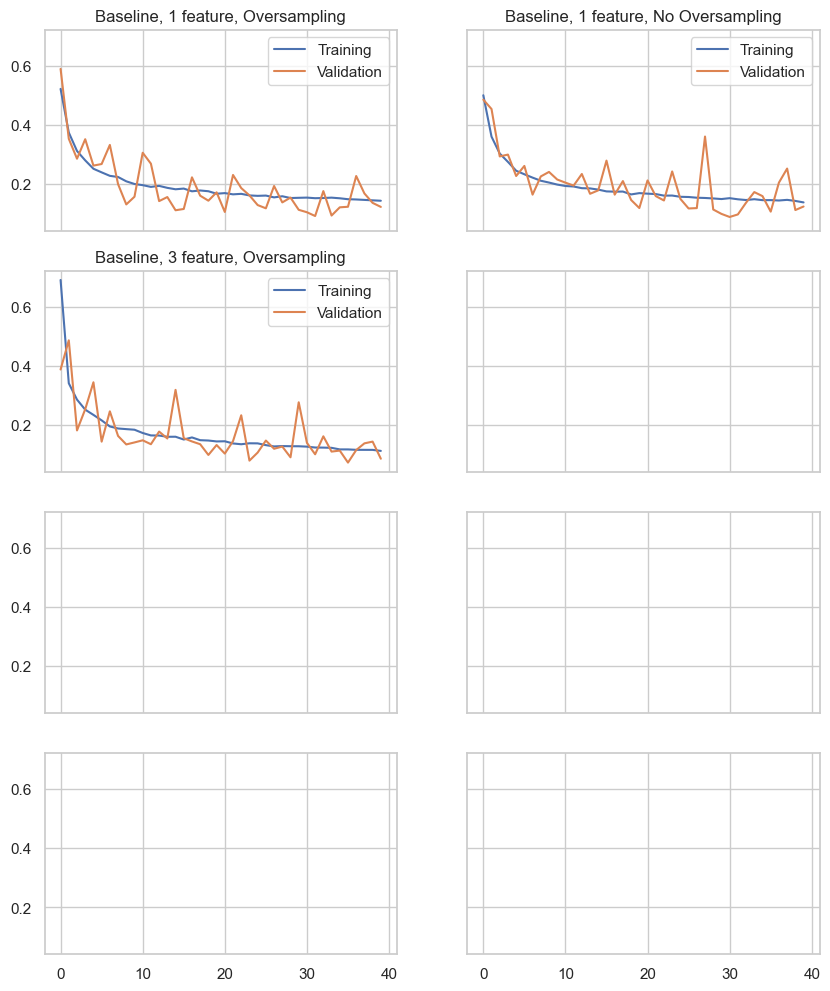

In [118]:
model_names_string = [f'{name[0].capitalize()}, {name[1]} feature, {"Oversampling" if name[2] else "No Oversampling"}' for name in model_names]

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

for j in range(8):
    ax = ([(k,i) for k in range(4) for i in range(2)])[j]
    plot_train_val_loss(histories[j], model_names_string[j], ax)

plt.suptitle('Training Loss vs Validation Loss')
fig.supxlabel("Epochs")
fig.supylabel("Loss")
plt.show()

In [ ]:
metric='f1'

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

for j in range(8):
    ax = ([(k,i) for k in range(4) for i in range(2)])[j]
    plot_train_val_metric(histories[j], model_names_string[j], ax, metric=metric)

plt.suptitle(f'Training {metric} vs Validation {metric}')
fig.supxlabel("Epochs")
fig.supylabel(f"{metric}")
plt.show()

# Final Results
Dummy / sketch dataframe (just as an example, sub-models and statistics tbc)

In [ ]:
tuples = [('Baseline Random Guess', 'N/A'),
        ('BC', 'No oversampling, all features'),
         ('BC', 'No oversampling, top 10 features'),
         ('BC', 'Oversampling, all features'),
         ('BC', 'Oversampling, top 10 features'),
         ('RF', 'No oversampling'),
         ('RF', 'Oversampling'),
         ('NN', 'No oversampling'),
         ('NN', 'Oversampling')]

index = pd.MultiIndex.from_tuples(tuples, names=["Model", "Sub-Model"])

df = pd.DataFrame(columns = {'F1': [0,0,0,0,0,0,0,0,0], 
                            'Precision': [0,0,0,0,0,0,0,0,0],
                            'Recall': [0,0,0,0,0,0,0,0,0],
                            'AUC': [0,0,0,0,0,0,0,0,0], 
                            'Acc': [0,0,0,0,0,0,0,0,0]}, index = index)

df